<a href="https://colab.research.google.com/github/ciepielajan/Multi-Class-Classification-NLP/blob/main/ML-MultinomialNB%20TfIdf%20feature%20selection%20Chi-Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML-MultinomialNB TfIdf feature selection Chi-Square 

#### Pobranie danych

In [1]:
# https://drive.google.com/file/d/1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq/view?usp=sharing
!gdown --id "1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq"

Downloading...
From: https://drive.google.com/uc?id=1fI6EXyD9TMTC1jzdu206ljXOGNjdHprq
To: /content/user_intent.zip
100% 271k/271k [00:00<00:00, 37.3MB/s]


In [2]:
!unzip "user_intent.zip"

Archive:  user_intent.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: validation.csv          


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

data_set_train = pd.read_csv("train.csv")
data_set_valid = pd.read_csv("validation.csv")

print(data_set_train.shape)
print(data_set_valid.shape)

print(data_set_train.columns)
print(data_set_valid.columns)

(13784, 2)
(700, 2)
Index(['text', 'label'], dtype='object')
Index(['text', 'label'], dtype='object')


#### Podstawowy process text

In [4]:
import re
def process_text(sentence):
    sentence = re.sub('[A-Za-z0-9]+@[a-zA-z].[a-zA-Z]+', '', sentence)  # maile
    sentence = re.sub('(http[s]*:[/][/])[a-zA-Z0-9]+', '', sentence)  # linki
    sentence = re.sub(r"<[^>]+>", " ", sentence) # remove html tag
    sentence = re.sub(r"[^a-zA-Z\s]", "", sentence)  # remove punctuations and numbers   
    sentence = re.sub(r"\b[A-Za-z]{1}\b", "", sentence)  # remove single characters

    sentence = re.sub("^\s+|\s+$", "", sentence, flags=re.UNICODE) # Remove spaces both in the BEGINNING and in the END of a string:
    sentence = " ".join(re.split("\s+", sentence, flags=re.UNICODE))  # Remove ONLY DUPLICATE spaces:
    sentence = sentence.lower()
    
    return sentence

In [5]:
data_set_train["clean_text"] = data_set_train["text"].apply(lambda x: process_text(x))

#### `LabelEncoder` 

In [6]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# data_set_train["labelencoder"] = labelencoder.fit_transform(data_set_train["label"])

# # dummy_y = to_categorical(data_set_train["labelencoder"], dtype ="float32")

# data_set_train[["clean_text","label","labelencoder"]].head(5)

In [7]:
# id_intention = 6
# print("Sprawdzenie poprawności LabelEncoder i to_categorical \n")
# print("Label - ", data_set_train["label"].iloc[id_intention])
# print("LabelEncoder - ", data_set_train["labelencoder"].iloc[id_intention])
# print("return to Label - ", labelencoder.inverse_transform([ data_set_train["labelencoder"].iloc[id_intention]  ]) )

#### Zdefiniowanie X i y

In [8]:
X = data_set_train["clean_text"]
y = data_set_train["label"]

In [9]:
X.shape, y.shape

((13784,), (13784,))

#### Podział zbioru 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11027,), (2757,), (11027,), (2757,))

#### `TfIdfVectorizer`

W pierwszej kolejności analizie poddamy przekształcenie korpusu oczyszczonych danych za pomocą TfIdfVectorizera w celu wydobycia słownika najczęstych słów i stowrzenia macierzy cech - złożonej ze słów "kluczy" w tekstach komend poprzez przypisanie im stosownej wagi. Słowa będące najistotniejsze będą miały najwyższe wagi.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# stworzenie TfIdfVectorizera biorącego max 10000 najczęstszych słów ze wszystkich tekstów, zbudowanego z unigramów i bigramów
vectorizer_tf_idf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
vectorizer_tf_idf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

W celu wyciągnięcia najbardziej istotnych cech (z dotychczas zdefiniowanych jako max_features=10000) wykonamy następujące operacje:


1. potraktujemy każdą z kategorii jako binarną (np. 'RateBook' będzie 1 a pozostałe 0),
2. przeprowadzimy [Chi-Square](https://en.wikipedia.org/wiki/Chi-squared_test) test do oceny czy dana cecha i binarny target są niezależne,
3. pozostawimy tylko cechy z określonym p-value z Chi-Square test.



In [ ]:
from sklearn import feature_selection

In [ ]:
y = dtf_train['label']
X_names = vectorizer_tf_idf.get_feature_names()
p_value_limit = 0.95

dtf_features = pd. DataFrame()
for cat in np.unique(y):
  chi2, p = feature_selection.chi2(X_train, y==cat)
  dtf_features = dtf_features.append(pd.DataFrame(
      {'feature': X_names, 'score': 1-p, 'y': cat}
  ))
  dtf_features = dtf_features.sort_values(['y', 'score'], ascending=[True, False])
  dtf_features = dtf_features[dtf_features['score']>p_value_limit]
X_names = dtf_features['feature'].unique().tolist()

In [ ]:
# sprawdzenie zredukowanej liczby cech z 10000
len(X_names)

5947

Statystycznie 5947 cech zostało uznanych za wysoce znaczące.

Wyświetlmy dla przykładu kilka z nich dla poszczególnych kategorii czynności:

In [ ]:
for cat in np.unique(y): 
  print('# {}:'.format(cat))
  print(' -> ilość wybranych cech:',
        len(dtf_features[dtf_features['y']==cat]))
  print(' -> najpopularniejsze cechy: ',', '.join(
      dtf_features[dtf_features['y']==cat]['feature'].values[:10]
  ))
  print('  ')

# AddToPlaylist:
 -> ilość wybranych cech: 1590
 -> najpopularniejsze cechy:  add, add album, add artist, add song, add track, add tune, artist, chill, indie, list
  
# BookRestaurant:
 -> ilość wybranych cech: 1159
 -> najpopularniejsze cechy:  bar, book, book reservation, book restaurant, book spot, book table, brasserie, eat, food, highly
  
# GetWeather:
 -> ilość wybranych cech: 966
 -> najpopularniejsze cechy:  chillier, chilly, colder, forecast, freezing, going, hotter, how, is, is going
  
# PlayMusic:
 -> ilość wybranych cech: 867
 -> najpopularniejsze cechy:  ballad, can play, chant, deezer, ep, fifty, fourties, google, google music, groove
  
# RateBook:
 -> ilość wybranych cech: 669
 -> najpopularniejsze cechy:  best rating, chronicle, current, current album, current book, current essay, current novel, current textbook, deserves, essay
  
# SearchCreativeWork:
 -> ilość wybranych cech: 794
 -> najpopularniejsze cechy:  called, called the, can find, creative, creativity, fin

Zrefitujmy TfIdfVectorizer do nowego zbioru istotnych cech w celu wyprodukowania mniejszej macierzy cech i krótszego słownika.

In [ ]:
vectorizer_tf_idf = TfidfVectorizer(vocabulary=X_names)
vectorizer_tf_idf.fit(X_train)

In [14]:
X_train = vectorizer_tf_idf.transform(X_train)
X_test = vectorizer_tf_idf.transform(X_test)

In [15]:
# sprawdzenie rozmiaru X_train
X_train.shape, X_test.shape

((11027, 10000), (2757, 10000))

In [16]:
X_train

<11027x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 136498 stored elements in Compressed Sparse Row format>

In [17]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
pd.DataFrame(X_train.toarray(), columns=vectorizer_tf_idf.get_feature_names())

,abbott,abby,abdul,about,about football,about love,about when,above,absolutely,abyss,academy,acapella,access,accommodate,accommodate gretchen,accommodate party,according,according to,ace,acoustic,acoustic blues,acoustic concentration,acoustic covers,acoustic playlist,acoustic soul,acoustic spring,acoustics,acres,act,action,activity,activity playlist,ad,adam,adam yauch,adams,add,add album,add all,add an,...,you will,young,young to,your,your eyes,your favorite,your hand,your mind,your parents,youre,yourself,youth,youth against,youtube,youtube and,yuki,yuki koyanagi,yukon,zambia,zealand,zealand in,zebra,zen,zen focus,zero,zero am,zero and,zero for,zero oclock,zero of,zero out,zero pm,zero points,zero rating,zero stars,zez,zez di,zimbabwe,zvooq,zvooq by
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128140,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137331,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Model

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [20]:
model = MultinomialNB()

# train classifier
model.fit(X_train, y_train)

# test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [21]:
predicted_prob[0]

array([0.08979851, 0.00260954, 0.00262166, 0.89732679, 0.00178723,
       0.00396981, 0.00188645])

In [22]:
accuracy_score(y_test, predicted)

0.9775117881755532

In [23]:
confusion_matrix(y_test, predicted)

array([[396,   1,   0,   1,   0,   0,   0],
       [  0, 384,   0,   0,   0,   0,   0],
       [  0,   2, 392,   0,   0,   1,   1],
       [  9,   0,   0, 388,   0,   7,   1],
       [  0,   0,   0,   0, 399,   0,   0],
       [  1,   3,   1,   4,   3, 373,   7],
       [  0,   3,   2,   0,   0,  15, 363]])

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.98
F1_score: 0.98
                      precision    recall  f1-score   support

       AddToPlaylist       0.98      0.99      0.99       398
      BookRestaurant       0.98      1.00      0.99       384
          GetWeather       0.99      0.99      0.99       396
           PlayMusic       0.99      0.96      0.97       405
            RateBook       0.99      1.00      1.00       399
  SearchCreativeWork       0.94      0.95      0.95       392
SearchScreeningEvent       0.98      0.95      0.96       383

            accuracy                           0.98      2757
           macro avg       0.98      0.98      0.98      2757
        weighted avg       0.98      0.98      0.98      2757



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

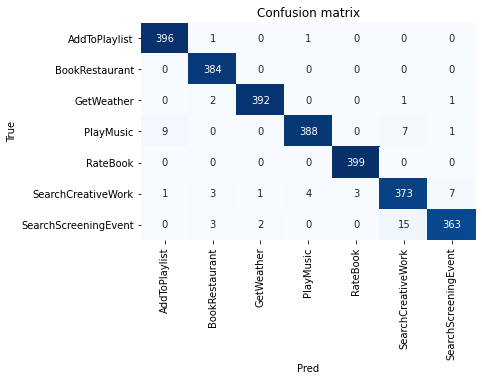

In [25]:
classes = np.unique(y_test)

print('Accuracy:', round(accuracy_score(y_test, predicted),2))
print('F1_score:', round(f1_score(y_test, predicted, average='weighted'),2))

print(classification_report(y_test, predicted))
# Plot confusion matrix
cm = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel='Pred', ylabel='True', xticklabels=classes, yticklabels=classes, title='Confusion matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### Predykcja na zbiorze validacyjnym

In [26]:
# oczysczenie danych
data_set_valid["clean_text"] = data_set_valid["text"].apply(lambda x: process_text(x))

# # labelencoder 
# data_set_valid["labelencoder"] = labelencoder.fit_transform(data_set_valid["label"])

X_validate = vectorizer_tf_idf.transform(data_set_valid["clean_text"])

X_validate

<700x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 8409 stored elements in Compressed Sparse Row format>

In [27]:
y_val = data_set_valid["label"].values
y_val[:5]

array(['SearchScreeningEvent', 'PlayMusic', 'GetWeather', 'AddToPlaylist',
       'SearchScreeningEvent'], dtype=object)

In [28]:
# Sprawdzenie rozmiaru zbiorów validacyjnego
X_validate.shape, y_val.shape

((700, 10000), (700,))

In [29]:
predicted_validate = model.predict(X_validate)
predicted_prob_validate = model.predict_proba(X_validate)

#### `Confusion matrix`

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

Accuracy: 0.98
F1_score: 0.98
                      precision    recall  f1-score   support

       AddToPlaylist       0.96      1.00      0.98       100
      BookRestaurant       1.00      1.00      1.00       100
          GetWeather       0.98      0.98      0.98       100
           PlayMusic       0.99      0.95      0.97       100
            RateBook       1.00      0.99      0.99       100
  SearchCreativeWork       0.93      0.99      0.96       100
SearchScreeningEvent       0.97      0.92      0.94       100

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

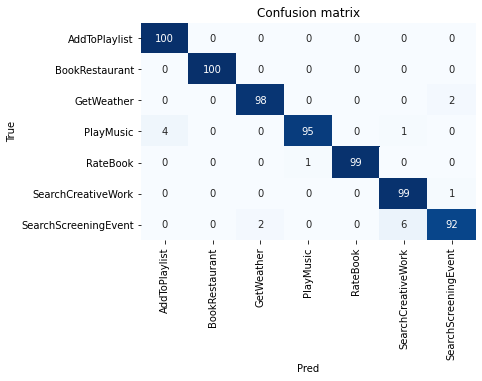

In [31]:
classes = np.unique(y_val)

print('Accuracy:', round(accuracy_score(y_val, predicted_validate),2))
print('F1_score:', round(f1_score(y_val, predicted_validate, average='weighted'),2))

print(classification_report(y_val, predicted_validate))
# Plot confusion matrix
cm = confusion_matrix(y_val, predicted_validate)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel='Pred', ylabel='True', xticklabels=classes, yticklabels=classes, title='Confusion matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### Zapoznanie się z błędnymi predykcjami 

In [32]:
indexes = []
for i, phrase in enumerate(predicted_validate):
  if phrase == 'SearchCreativeWork':
    if y_val[i] == 'SearchScreeningEvent':
      indexes.append(i)
print(indexes)

[145, 519, 557, 615, 648, 689]


In [33]:
# Tekst komendy użytkownika
for i in indexes:
  print(f"----------------------------\nTekst komendy:\n{data_set_valid['text'][i]}")
  print(f'True category: {y_val[i]}')
  print(f'Predicted category: {predicted_validate[i]}')
  print("\n")

----------------------------
Tekst komendy:
I want to see Medal for the General
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork


----------------------------
Tekst komendy:
i want to see JLA Adventures: Trapped In Time
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork


----------------------------
Tekst komendy:
I want to see Shattered Image.
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork


----------------------------
Tekst komendy:
Where can I see The Prime Ministers: The Pioneers
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork


----------------------------
Tekst komendy:
I want to see Outcast.
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork


----------------------------
Tekst komendy:
I want to see Fear Chamber.
True category: SearchScreeningEvent
Predicted category: SearchCreativeWork




Wnioski:
> 